In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [2]:
dataset=pd.read_csv('diabetes.csv')
print(len(dataset))
print(dataset.head())

768
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
print(dataset)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0   
12            10      139             

In [4]:
zero_not_accepted=['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

In [5]:
for column in zero_not_accepted:
    dataset[column]=dataset[column].replace(0,np.NaN)
    mean=int(dataset[column].mean(skipna=True))
    dataset[column]=dataset[column].replace(np.NaN,mean)

In [6]:
print(dataset["Glucose"])

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
5      116.0
6       78.0
7      115.0
8      197.0
9      125.0
10     110.0
11     168.0
12     139.0
13     189.0
14     166.0
15     100.0
16     118.0
17     107.0
18     103.0
19     115.0
20     126.0
21      99.0
22     196.0
23     119.0
24     143.0
25     125.0
26     147.0
27      97.0
28     145.0
29     117.0
       ...  
738     99.0
739    102.0
740    120.0
741    102.0
742    109.0
743    140.0
744    153.0
745    100.0
746    147.0
747     81.0
748    187.0
749    162.0
750    136.0
751    121.0
752    108.0
753    181.0
754    154.0
755    128.0
756    137.0
757    123.0
758    106.0
759    190.0
760     88.0
761    170.0
762     89.0
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64


In [7]:
print(dataset["BloodPressure"])

0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
5      74.0
6      50.0
7      72.0
8      70.0
9      96.0
10     92.0
11     74.0
12     80.0
13     60.0
14     72.0
15     72.0
16     84.0
17     74.0
18     30.0
19     70.0
20     88.0
21     84.0
22     90.0
23     80.0
24     94.0
25     70.0
26     76.0
27     66.0
28     82.0
29     92.0
       ... 
738    60.0
739    74.0
740    80.0
741    44.0
742    58.0
743    94.0
744    88.0
745    84.0
746    94.0
747    74.0
748    70.0
749    62.0
750    70.0
751    78.0
752    62.0
753    88.0
754    78.0
755    88.0
756    90.0
757    72.0
758    76.0
759    92.0
760    58.0
761    74.0
762    62.0
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64


In [8]:
#split dataset
x=dataset.iloc[:,0:8]
y=dataset.iloc[:,8]
x_train,x_test,y_train,y_test,=train_test_split(x,y,random_state=0,test_size=0.2)

In [9]:
#feature scaling
sc=StandardScaler()
x_train=sc.fit_transform(x_train)

In [10]:
x_test=sc.fit_transform(x_test)

In [11]:
#Define the model: Init K-NN
classifier=KNeighborsClassifier(n_neighbors=11,p=2,metric="euclidean")

In [12]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [13]:
#predict the test set results
y_pred=classifier.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [14]:
#Evaluate model
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(f1_score(y_test,y_pred))

[[95 12]
 [18 29]]
0.659090909091


In [15]:
print(accuracy_score(y_test,y_pred))

0.805194805195


# Example 2

In [19]:
#assuming predictors and target variables
x = np.array([[-3,7],[1,5],[1,2],[-2,0],[2,3],[-4,0],[-1,1],[1,1],[-2,2],[2,7],[-4,1],[-2,7]])
y = np.array([0,0,0,0,1,0,0,1,0,1,1,1])
x3 = np.array([[-3,7],[1,5],[1,2],[-2,0],[-4,0],[-1,1],[-2,2]])
x4 = np.array([[2,3],[1,1],[2,7],[-4,1],[-2,7]])

print(x3[...,0])
print(x3[...,1])

[-3  1  1 -2 -4 -1 -2]
[7 5 2 0 0 1 2]


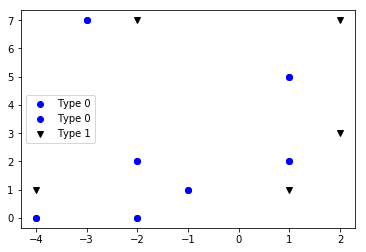

In [20]:
from matplotlib import pyplot as plt
plt.plot(x3[...,0],x3[...,1],"ob",label='Type 0')
plt.plot(x4[...,0],x4[...,1],"vk",label='Type 1')
plt.legend()
plt.show()

In [21]:
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
predicted=classifier.predict([[0,2],[3,4]])
print(predicted)

[0 1]


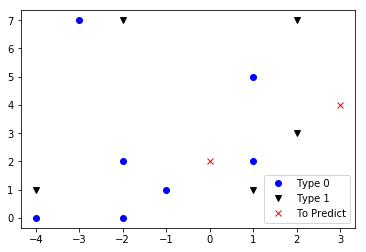

In [23]:
plt.plot(x3[...,0],x3[...,1],"ob",label='Type 0')
plt.plot(x4[...,0],x4[...,1],"vk",label='Type 1')
plt.plot([0,3],[2,4],"xr",label='To Predict')
plt.legend()
plt.show()

In [24]:
predicted=classifier.predict([[0,3],[2,4]])
print(predicted)

[0 1]
